In [1]:
# Change all the "game" to whichever file you want to preprocess and save as

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('reviews.csv', names=['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review', 'Review_Text'])

In [4]:
dataset.head()

,Game_ID,Num_Helpful,Num_Funny,Username,Num_Games_Owned,Num_Reviews_Written,Recommend,Hours_Played,Date_of_Review,Review_Text
0,1536770,0,0,76561198079596463,308,10,1,29.9,"October 24, 2022",I am not necessarily a beginner to programming...
1,1536770,0,0,76561198117872958,241,7,1,6.4,"October 9, 2022",game seems to install Uwamson Trojan or is it ...
2,1536770,1,0,76561198056557298,36,1,1,9.9,"September 19, 2022",Really good tool to learn the basics of progra...
3,1536770,0,0,76561198098403719,61,5,1,4.9,"August 25, 2022",Fun tool for getting started
4,1536770,6,1,JcJet,864,231,-1,0.2,"July 5, 2022",Game requires Internet connection and doesn't ...


In [5]:
dataset.columns

Index(['Game_ID', 'Num_Helpful', 'Num_Funny', 'Username', 'Num_Games_Owned',
       'Num_Reviews_Written', 'Recommend', 'Hours_Played', 'Date_of_Review',
       'Review_Text'],
      dtype='object')

In [6]:
# clean up uneeded columns
dataset.drop(labels = ['Game_ID', 'Username', 'Num_Games_Owned', 'Num_Reviews_Written'], axis=1, inplace=True)

In [7]:
dataset.head()

,Num_Helpful,Num_Funny,Recommend,Hours_Played,Date_of_Review,Review_Text
0,0,0,1,29.9,"October 24, 2022",I am not necessarily a beginner to programming...
1,0,0,1,6.4,"October 9, 2022",game seems to install Uwamson Trojan or is it ...
2,1,0,1,9.9,"September 19, 2022",Really good tool to learn the basics of progra...
3,0,0,1,4.9,"August 25, 2022",Fun tool for getting started
4,6,1,-1,0.2,"July 5, 2022",Game requires Internet connection and doesn't ...


In [8]:
print(dataset.dtypes)

Num_Helpful         int64
Num_Funny           int64
Recommend           int64
Hours_Played      float64
Date_of_Review     object
Review_Text        object
dtype: object


In [9]:
# organize the columns so it would be easier to sort the features vs the output
df = dataset[['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend']]
df.head(20)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend
0,"October 24, 2022",I am not necessarily a beginner to programming...,0,0,29.9,1
1,"October 9, 2022",game seems to install Uwamson Trojan or is it ...,0,0,6.4,1
2,"September 19, 2022",Really good tool to learn the basics of progra...,1,0,9.9,1
3,"August 25, 2022",Fun tool for getting started,0,0,4.9,1
4,"July 5, 2022",Game requires Internet connection and doesn't ...,6,1,0.2,-1
5,"June 4, 2022",A very simply designed walk through of coding ...,1,0,10.7,1
6,"May 30, 2022","great resource! nicely put together, explained...",0,0,8.3,1
7,"May 22, 2022",Exercises can not be skipped. Answers are also...,8,1,68.6,-1
8,"May 21, 2022",Decent tool to help learn python,0,0,5.9,1
9,"April 13, 2022","I did it, for a few minutes, and now i know py...",0,0,0.4,1


In [10]:
df.columns

Index(['Date_of_Review', 'Review_Text', 'Num_Helpful', 'Num_Funny',
       'Hours_Played', 'Recommend'],
      dtype='object')

# Convert date to datetime format

In [11]:
import datetime as dt

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date_of_Review  47 non-null     object 
 1   Review_Text     47 non-null     object 
 2   Num_Helpful     47 non-null     int64  
 3   Num_Funny       47 non-null     int64  
 4   Hours_Played    47 non-null     float64
 5   Recommend       47 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 2.3+ KB


In [13]:
# change date to unix datetime
dates = pd.to_datetime(df['Date_of_Review'])

# calculate unix datetime starting from 01-01-1970
df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_28212/3723366679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch'] = (dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch
0,"October 24, 2022",I am not necessarily a beginner to programming...,0,0,29.9,1,1666569600
1,"October 9, 2022",game seems to install Uwamson Trojan or is it ...,0,0,6.4,1,1665273600
2,"September 19, 2022",Really good tool to learn the basics of progra...,1,0,9.9,1,1663545600
3,"August 25, 2022",Fun tool for getting started,0,0,4.9,1,1661385600
4,"July 5, 2022",Game requires Internet connection and doesn't ...,6,1,0.2,-1,1656979200


In [14]:
# change the epoch time from total number of seconds into week number since(take the Date_Epoch and mod (b/c we want integers only) by num_secs_week = 7day/wk * 24hr/day * 60min/hr * 60sec/min = 604800)

df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800

df.head()

C:\Users\anqiz\AppData\Local\Temp/ipykernel_28212/3335926905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Epoch_Week'] = df['Date_Epoch'] // 604800


,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 24, 2022",I am not necessarily a beginner to programming...,0,0,29.9,1,1666569600,2755
1,"October 9, 2022",game seems to install Uwamson Trojan or is it ...,0,0,6.4,1,1665273600,2753
2,"September 19, 2022",Really good tool to learn the basics of progra...,1,0,9.9,1,1663545600,2750
3,"August 25, 2022",Fun tool for getting started,0,0,4.9,1,1661385600,2747
4,"July 5, 2022",Game requires Internet connection and doesn't ...,6,1,0.2,-1,1656979200,2739


In [15]:
df.sort_values(by=['Date_Epoch_Week'],ascending=True).groupby('Date_Epoch_Week')
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 24, 2022",I am not necessarily a beginner to programming...,0,0,29.9,1,1666569600,2755
1,"October 9, 2022",game seems to install Uwamson Trojan or is it ...,0,0,6.4,1,1665273600,2753
2,"September 19, 2022",Really good tool to learn the basics of progra...,1,0,9.9,1,1663545600,2750
3,"August 25, 2022",Fun tool for getting started,0,0,4.9,1,1661385600,2747
4,"July 5, 2022",Game requires Internet connection and doesn't ...,6,1,0.2,-1,1656979200,2739


## - Data Aggregation -

### Number of text reviews per day:

In [16]:
# reindex gets the columns needed
df_text = df.reindex(['Date_Epoch_Week','Date_of_Review', 'Review_Text'], axis=1)
df_text.head()
# formats to year-month datetime format
# df_text['Year_Month'] = pd.to_datetime(df_text['Year_Month'], format="%Y/%m")

,Date_Epoch_Week,Date_of_Review,Review_Text
0,2755,"October 24, 2022",I am not necessarily a beginner to programming...
1,2753,"October 9, 2022",game seems to install Uwamson Trojan or is it ...
2,2750,"September 19, 2022",Really good tool to learn the basics of progra...
3,2747,"August 25, 2022",Fun tool for getting started
4,2739,"July 5, 2022",Game requires Internet connection and doesn't ...


In [17]:

# groupby counts the total number of reviews per day
text_days = df_text.groupby(['Date_Epoch_Week', 'Date_of_Review']).size().reset_index().rename(columns={0: 'review_count'})
text_days

,Date_Epoch_Week,Date_of_Review,review_count
0,2720,"February 19, 2022",6
1,2720,"February 20, 2022",6
2,2720,"February 21, 2022",6
3,2720,"February 23, 2022",3
4,2721,"February 24, 2022",7
5,2721,"February 26, 2022",1
6,2721,"February 28, 2022",4
7,2722,"March 3, 2022",1
8,2723,"March 16, 2022",1
9,2724,"March 18, 2022",1


<AxesSubplot:>

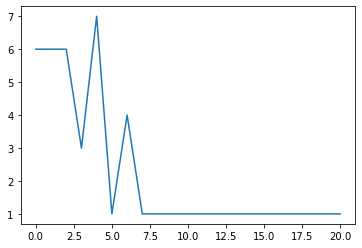

In [18]:
text_days['review_count'].plot()

In [19]:
# total number of text reviews
text_days['review_count'].sum()

47

In [20]:
# average number of text reviews per day
text_days['review_count'].mean()

2.238095238095238

### Number of text reviews per week:

In [21]:
df_text = df.reindex(['Date_Epoch_Week','Review_Text'], axis=1)
text_weeks = df_text.groupby('Date_Epoch_Week').size().reset_index().rename(columns={0: 'review_count'})
text_weeks

,Date_Epoch_Week,review_count
0,2720,21
1,2721,12
2,2722,1
3,2723,1
4,2724,2
5,2727,1
6,2733,2
7,2734,1
8,2735,1
9,2739,1


<AxesSubplot:>

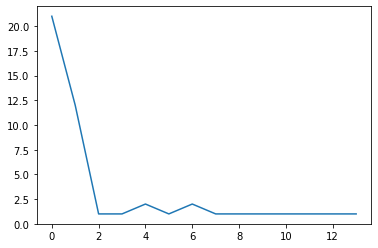

In [22]:
text_weeks['review_count'].plot()

In [23]:
# total number of text reviews
text_weeks['review_count'].sum()

47

In [24]:
# average number of text reviews per week
text_weeks['review_count'].mean()

3.357142857142857

### Num_Helpful per week:

In [25]:
df.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 24, 2022",I am not necessarily a beginner to programming...,0,0,29.9,1,1666569600,2755
1,"October 9, 2022",game seems to install Uwamson Trojan or is it ...,0,0,6.4,1,1665273600,2753
2,"September 19, 2022",Really good tool to learn the basics of progra...,1,0,9.9,1,1663545600,2750
3,"August 25, 2022",Fun tool for getting started,0,0,4.9,1,1661385600,2747
4,"July 5, 2022",Game requires Internet connection and doesn't ...,6,1,0.2,-1,1656979200,2739


In [26]:
df_helpful = df.reindex(['Date_Epoch_Week', 'Num_Helpful'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.sum().reset_index().rename(columns={0: 'helpful_count'})


,Date_Epoch_Week,Num_Helpful
0,2720,372
1,2721,16
2,2722,45
3,2723,1
4,2724,14
5,2727,0
6,2733,8
7,2734,0
8,2735,1
9,2739,6


In [27]:
df_helpful.groupby('Date_Epoch_Week').Num_Helpful.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2720,56,4,14.0,17.714286
2721,6,0,1.0,1.333333
2722,45,45,45.0,45.000000
2723,1,1,1.0,1.000000
2724,10,4,7.0,7.000000
2727,0,0,0.0,0.000000
2733,8,0,4.0,4.000000
2734,0,0,0.0,0.000000
2735,1,1,1.0,1.000000


In [28]:
# total number of helpful votes of all users for all text reviews combined
df_helpful['Num_Helpful'].sum()

464

In [29]:
# average number of helpful votes on all reviews by all users
df_helpful['Num_Helpful'].mean()

9.872340425531915

### Num_Funny per week:

In [30]:
df_funny = df.reindex(['Date_Epoch_Week', 'Num_Funny'], axis=1)
# total num of helpful votes per month (but keep in mind that helpful votes are for 1 review at a time)
df_funny.groupby('Date_Epoch_Week').Num_Funny.sum().reset_index().rename(columns={0: 'funny_count'})

,Date_Epoch_Week,Num_Funny
0,2720,12
1,2721,5
2,2722,0
3,2723,0
4,2724,2
5,2727,0
6,2733,1
7,2734,0
8,2735,0
9,2739,1


In [31]:
df_funny.groupby('Date_Epoch_Week').Num_Funny.agg(['max', 'min', 'median', 'mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2720,2,0,0.0,0.571429
2721,2,0,0.0,0.416667
2722,0,0,0.0,0.000000
2723,0,0,0.0,0.000000
2724,2,0,1.0,1.000000
2727,0,0,0.0,0.000000
2733,1,0,0.5,0.500000
2734,0,0,0.0,0.000000
2735,0,0,0.0,0.000000


In [32]:
# total number of funny votes of all users for all text reviews combined
df_funny['Num_Funny'].sum()

21

In [33]:
# average number of funny votes on all reviews by all users
df_funny['Num_Funny'].mean()

0.44680851063829785

### Hours_Played per week:

In [34]:
df_hrs_plyd = df.reindex(['Date_Epoch_Week','Hours_Played'], axis=1)

# total num of hours played of the game for each month for all reviewers
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.sum().reset_index().rename(columns={0: 'hrs_pld_count'})

,Date_Epoch_Week,Hours_Played
0,2720,183.0
1,2721,285.1
2,2722,0.5
3,2723,1.1
4,2724,4.6
5,2727,0.4
6,2733,74.5
7,2734,8.3
8,2735,10.7
9,2739,0.2


In [35]:
df_hrs_plyd.groupby('Date_Epoch_Week').Hours_Played.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2720,17.5,4.0,6.00,8.714286
2721,75.9,0.1,5.70,23.758333
2722,0.5,0.5,0.50,0.500000
2723,1.1,1.1,1.10,1.100000
2724,3.0,1.6,2.30,2.300000
2727,0.4,0.4,0.40,0.400000
2733,68.6,5.9,37.25,37.250000
2734,8.3,8.3,8.30,8.300000
2735,10.7,10.7,10.70,10.700000


In [36]:
# total number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].sum()

619.4999999999999

In [37]:
# average number of hours played of the game by all users
df_hrs_plyd['Hours_Played'].mean()

13.180851063829785

### Recommend per week:

In [38]:
df_recmd = df.reindex(['Date_Epoch_Week','Recommend'], axis=1)

# avgerage number of reviewers recommended(1) + not recommended(-1) the game after writing the review for each week
df_recmd.groupby('Date_Epoch_Week',).Recommend.mean().reset_index().rename(columns={0: 'recmd_count'})

,Date_Epoch_Week,Recommend
0,2720,0.428571
1,2721,0.833333
2,2722,-1.000000
3,2723,-1.000000
4,2724,0.000000
5,2727,1.000000
6,2733,0.000000
7,2734,1.000000
8,2735,1.000000
9,2739,-1.000000


In [39]:
df_recmd.groupby('Date_Epoch_Week').Recommend.agg(['max','min','median','mean'])

,max,min,median,mean
Date_Epoch_Week,,,,
2720,1,-1,1.0,0.428571
2721,1,-1,1.0,0.833333
2722,-1,-1,-1.0,-1.000000
2723,-1,-1,-1.0,-1.000000
2724,1,-1,0.0,0.000000
2727,1,1,1.0,1.000000
2733,1,-1,0.0,0.000000
2734,1,1,1.0,1.000000
2735,1,1,1.0,1.000000


In [40]:
# total number of users who recommend the game
df_recmd['Recommend'].sum()

23

In [41]:
# average score of recommend/not recommend by all users
df_recmd['Recommend'].mean()

0.48936170212765956

## Feature Scaling - Min-Max Normalization

In [42]:
df_min_max_scaled = df.copy()

In [43]:
df_min_max_scaled.head()

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 24, 2022",I am not necessarily a beginner to programming...,0,0,29.9,1,1666569600,2755
1,"October 9, 2022",game seems to install Uwamson Trojan or is it ...,0,0,6.4,1,1665273600,2753
2,"September 19, 2022",Really good tool to learn the basics of progra...,1,0,9.9,1,1663545600,2750
3,"August 25, 2022",Fun tool for getting started,0,0,4.9,1,1661385600,2747
4,"July 5, 2022",Game requires Internet connection and doesn't ...,6,1,0.2,-1,1656979200,2739


In [44]:
#df_min_max_scaled['Num_Helpful'] = (df_min_max_scaled['Num_Helpful'] - df_min_max_scaled['Num_Helpful'].min()) / (df_min_max_scaled['Num_Helpful'].max() - df_min_max_scaled['Num_Helpful'].min())
#df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Hours_Played'] = (df_min_max_scaled['Hours_Played'] - df_min_max_scaled['Hours_Played'].min()) / (df_min_max_scaled['Hours_Played'].max() - df_min_max_scaled['Hours_Played'].min()) 
df_min_max_scaled['Recommend'] = (df_min_max_scaled['Recommend'] - df_min_max_scaled['Recommend'].min()) / (df_min_max_scaled['Recommend'].max() - df_min_max_scaled['Recommend'].min()) 
df_min_max_scaled['Date_Epoch'] = (df_min_max_scaled['Date_Epoch'] - df_min_max_scaled['Date_Epoch'].min()) / (df_min_max_scaled['Date_Epoch'].max() - df_min_max_scaled['Date_Epoch'].min()) 
#df_min_max_scaled['Date_Epoch_Week'] = (df_min_max_scaled['Date_Epoch_Week'] - df_min_max_scaled['Date_Epoch_Week'].min()) / (df_min_max_scaled['Date_Epoch_Week'].max() - df_min_max_scaled['Date_Epoch_Week'].min()) 

display(df_min_max_scaled)

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 24, 2022",I am not necessarily a beginner to programming...,0,0,0.393140,1.0,1.000000,2755
1,"October 9, 2022",game seems to install Uwamson Trojan or is it ...,0,0,0.083113,1.0,0.939271,2753
2,"September 19, 2022",Really good tool to learn the basics of progra...,1,0,0.129288,1.0,0.858300,2750
3,"August 25, 2022",Fun tool for getting started,0,0,0.063325,1.0,0.757085,2747
4,"July 5, 2022",Game requires Internet connection and doesn't ...,6,1,0.001319,0.0,0.550607,2739
5,"June 4, 2022",A very simply designed walk through of coding ...,1,0,0.139842,1.0,0.425101,2735
6,"May 30, 2022","great resource! nicely put together, explained...",0,0,0.108179,1.0,0.404858,2734
7,"May 22, 2022",Exercises can not be skipped. Answers are also...,8,1,0.903694,0.0,0.372470,2733
8,"May 21, 2022",Decent tool to help learn python,0,0,0.076517,1.0,0.368421,2733
9,"April 13, 2022","I did it, for a few minutes, and now i know py...",0,0,0.003958,1.0,0.214575,2727


In [45]:
df_sorted = df_min_max_scaled.sort_values(by='Date_Epoch', ascending=False)

In [46]:
pd.set_option('display.max_rows', None)

In [47]:
df_sorted = df_sorted.reset_index(drop=True)

In [48]:
# drop all n/a data
clean_df=df.drop(df[df['Review_Text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['Recommend'].isna()].index, inplace=True)

C:\Users\anqiz\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
# delete Chinese characters in text reviews
df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_28212/2491715762.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_sorted['Review_Text'] = df_sorted['Review_Text'].str.replace(r'[^\x00-\x7F]+', '')


In [50]:
df_sorted

,Date_of_Review,Review_Text,Num_Helpful,Num_Funny,Hours_Played,Recommend,Date_Epoch,Date_Epoch_Week
0,"October 24, 2022",I am not necessarily a beginner to programming...,0,0,0.393140,1.0,1.000000,2755
1,"October 9, 2022",game seems to install Uwamson Trojan or is it ...,0,0,0.083113,1.0,0.939271,2753
2,"September 19, 2022",Really good tool to learn the basics of progra...,1,0,0.129288,1.0,0.858300,2750
3,"August 25, 2022",Fun tool for getting started,0,0,0.063325,1.0,0.757085,2747
4,"July 5, 2022",Game requires Internet connection and doesn't ...,6,1,0.001319,0.0,0.550607,2739
5,"June 4, 2022",A very simply designed walk through of coding ...,1,0,0.139842,1.0,0.425101,2735
6,"May 30, 2022","great resource! nicely put together, explained...",0,0,0.108179,1.0,0.404858,2734
7,"May 22, 2022",Exercises can not be skipped. Answers are also...,8,1,0.903694,0.0,0.372470,2733
8,"May 21, 2022",Decent tool to help learn python,0,0,0.076517,1.0,0.368421,2733
9,"April 13, 2022","I did it, for a few minutes, and now i know py...",0,0,0.003958,1.0,0.214575,2727


In [51]:
# sorted review text
df_text_list = df_sorted.groupby('Date_Epoch_Week')['Review_Text'].apply(list) # save separately as json file

In [52]:
df_text_list

Date_Epoch_Week
2720    [Great resource! I had some programming experi...
2721    [As someone who can never get past the definit...
2722    [Disclaimer: I am a programming teacher and I ...
2723    [As someone trying to learn and implement pyth...
2724    [So I've got minimal coding knowledge going in...
2727    [I did it, for a few minutes, and now i know p...
2733    [Exercises can not be skipped. Answers are als...
2734    [great resource! nicely put together, explaine...
2735    [A very simply designed walk through of coding...
2739    [Game requires Internet connection and doesn't...
2747                       [Fun tool for getting started]
2750    [Really good tool to learn the basics of progr...
2753    [game seems to install Uwamson Trojan or is it...
2755    [I am not necessarily a beginner to programmin...
Name: Review_Text, dtype: object

In [53]:
# storing data in JSON format
df_text_list.to_json('learnprog_text.json', orient = 'split', compression = 'infer')

In [54]:
# reading the JSON file
game_text = pd.read_json('learnprog_text.json')
print(game_text)

           name  index                                               data
0   Review_Text   2720  [Great resource! I had some programming experi...
1   Review_Text   2721  [As someone who can never get past the definit...
2   Review_Text   2722  [Disclaimer: I am a programming teacher and I ...
3   Review_Text   2723  [As someone trying to learn and implement pyth...
4   Review_Text   2724  [So I've got minimal coding knowledge going in...
5   Review_Text   2727  [I did it, for a few minutes, and now i know p...
6   Review_Text   2733  [Exercises can not be skipped. Answers are als...
7   Review_Text   2734  [great resource! nicely put together, explaine...
8   Review_Text   2735  [A very simply designed walk through of coding...
9   Review_Text   2739  [Game requires Internet connection and doesn't...
10  Review_Text   2747                     [Fun tool for getting started]
11  Review_Text   2750  [Really good tool to learn the basics of progr...
12  Review_Text   2753  [game seems to

In [55]:
# mean of other columns; save as csv file
mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly
mean_per_week.to_csv('learnprog_mean_week.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_28212/779217810.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_per_week = df_sorted.groupby('Date_Epoch_Week')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for weekly


In [56]:
mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily
mean_day.to_csv('learnprog_mean_day.csv')

C:\Users\anqiz\AppData\Local\Temp/ipykernel_28212/1634748621.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_day = df_sorted.groupby('Date_Epoch')['Num_Helpful', 'Num_Funny', 'Hours_Played', 'Recommend'].mean() # for daily


In [57]:
# storing data in CSV format
game_review = df_sorted.to_csv('learnprog_review.csv', columns=['Date_Epoch_Week', 'Review_Text'])